In [1]:
## Import cell
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy.testing as npt
import Omelyan_SST_Solver as SST

Before starting on the Henon-Heiles Potential, I want to test up my 2D ODE solver that is written in the Omelyan_SST_Solver.py file. Because I want to ensure stable solutions with conserved energy over long periods of time (to quantify chaotic behavior), I implemented a strong symplectic integration solver based on tutorial 20. Note: I'll work in units where __m = 1__ because this is how the Henon-Heiles Potential is usually defined.

$H = \frac{p_x^2}{2} + \frac{p_y^2}{2} + V(x,y)$

$\frac{dx}{dt} = \frac{\partial{H}}{\partial{p_x}} = p_x $

$\frac{dy}{dt} = \frac{\partial{H}}{\partial{p_y}} = p_y $

$\frac{d p_x}{dt} = - \frac{\partial{H}}{\partial{x}} = - \frac{\partial}{\partial{x}} V(x,y)$

$\frac{d p_y}{dt} = - \frac{\partial{H}}{\partial{y}} = - \frac{\partial}{\partial{y}} V(x,y)$

To test my solver, I'll implement it for a simple Hamiltonian: the 2D (anisotropic) harmonic oscillator with m = 1.

$V(x,y) = \frac{1}{2} \omega_x^2 x^2 + \frac{1}{2} \omega_y^2 y^2$

$\frac{\partial{V}}{\partial{x}} = \omega_x^2 x$

$\frac{\partial{V}}{\partial{y}} = \omega_y^2 y$

I'll solve the system for some specific initial conditions that let me easily compare to the exact solution. $x_0 = 1, y_0 = 0, p_{0x} = 0, p_{0y} = 1$. I'll also have the oscillator frequencies be different for the x and y directions.

In [2]:
omega_x = 1
omega_y = 2
def dVHO_dx(x, y):
    return omega_x**2 * x
def dVHO_dy(x, y):
    return omega_y**2 * y

For testing that my solver works and is useful for exploring long-term behavior, I want to ensure:
 - The trajectories for $x(t)$, $y(t)$, $p_x(t)$, $p_y(t)$ match the exact solution of this system for the given initial conditions:
 
 $x(t) = cos(\omega_x t)$;     $y(t) = \frac{1}{\omega_y} sin(\omega_y t)$
 
 $p_x(t) = - \omega_x sin(\omega_x t)$;     $p_y(t) = cos(\omega_y t)$
 
 
 - The phase space plots are closed orbits for both the x and y directions as expected for a harmonic oscillator
 - Energy is conserved throughout the calculation, so there is no orbit instability in my numerical solutions




(-1.5, 1.5)

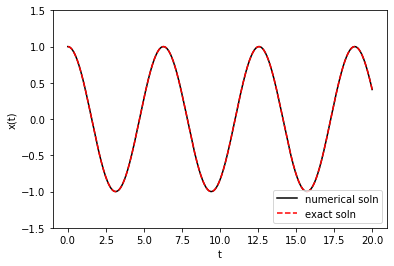

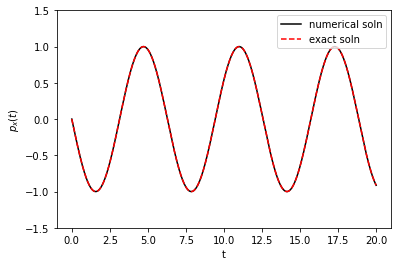

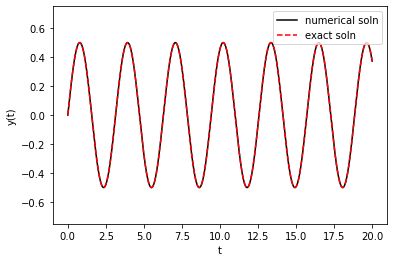

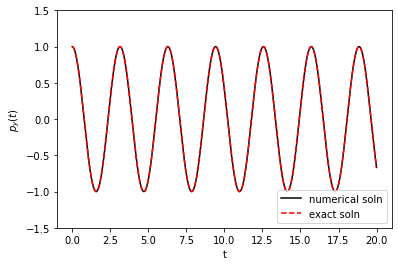

In [3]:
# Make sure numerical solutions match exact solutions

t = np.linspace(0, 20, 20000)
x_HO, y_HO, px_HO, py_HO = SST.solve(t, 1, 0, 0, 1, dVHO_dx, dVHO_dy)

plt.plot(t, x_HO, color='k', label='numerical soln')
plt.plot(t, np.cos(omega_x * t), linestyle='--', color='r', label='exact soln')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.figure()
plt.plot(t, px_HO, color='k', label='numerical soln')
plt.plot(t, -omega_x * np.sin(omega_x * t), linestyle='--', color='r', label='exact soln')
plt.xlabel('t')
plt.ylabel('$p_x(t)$')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.figure()
plt.plot(t, y_HO, color='k', label='numerical soln')
plt.plot(t, 1/omega_y * np.sin(omega_y* t), linestyle='--', color='r', label='exact soln')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.ylim(-0.75, 0.75)
plt.figure()
plt.plot(t, py_HO, color='k', label='numerical soln')
plt.plot(t, np.cos(omega_y * t), linestyle='--', color='r', label='exact soln')
plt.xlabel('t')
plt.ylabel('$p_y(t)$')
plt.legend()
plt.ylim(-1.5, 1.5)

I see that the exact and numerical solutions above match.

Text(0, 0.5, '$p_y$')

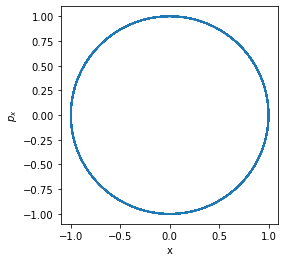

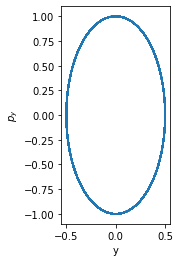

In [4]:
# Make sure phase space plots are closed orbits, even for a long time t

t_long = np.linspace(0, 200, 200000)

x_HO, y_HO, px_HO, py_HO = SST.solve(t_long, 1, 0, 0, 1, dVHO_dx, dVHO_dy)

plt.plot(x_HO, px_HO)
plt.axis('scaled') # make x and y axes the same scale so I can see it is circular
plt.xlabel('x')
plt.ylabel('$p_x$')
plt.figure()
plt.plot(y_HO, py_HO)
plt.axis('scaled')
plt.xlabel('y')
plt.ylabel('$p_y$')

The phase space plots are indeed closed orbits for this well-understood system.

dt = 0.0010000050000250002


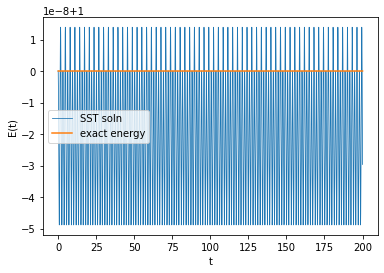

In [5]:
# Make sure energy is conserved by plotting E(t) for a long time t

print('dt =', t_long[1]-t_long[0])

E_i = px_HO[0]**2 / 2 + py_HO[0]**2 / 2 + 1/2*(omega_x**2 * x_HO[0]**2 + omega_y**2 * y_HO[0]**2)
E_f = px_HO[-1]**2 / 2 + py_HO[-1]**2 / 2 + 1/2*(omega_x**2 * x_HO[-1]**2 + omega_y**2 * y_HO[-1]**2)
npt.assert_allclose(E_i, E_f, rtol=1e-6)

E = 1/2 * (px_HO**2 + py_HO**2 + omega_x**2*x_HO**2 + omega_y**2*y_HO**2)
E_exact_plot = E_i*np.ones_like(t_long)
plt.plot(t_long, E, label='SST soln', linewidth=0.8)
plt.plot(t_long, E_exact_plot, label='exact energy')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.legend()

I see that the energy for the Omelyan SST symplectic solution oscillates very narrowly (${\sim} 10^{-8}$) around the true conserved energy for the system for $dt = 10^{-3}$, which is what I would expect for a symplectic integration method. With these three tests, I would say I am happy with my ODE solver and I am comfortable implementing it for the Henon-Heiles Potential.